# Data analysis project 1:
Hypothesis testing of movie ratings data

### Mission command preamble: 
As in general, we won’t tell you how to do something. That is up to you and your creative problem solving skills. However, we will tell you what we would like you to do. One exception: We do expect you to do this work yourself, so it reflects your intellectual contribution.

### Purpose: 
In this project, you will demonstrate the essential skills involved in hypothesis testing. To do so, we will use a real dataset that stems from a replication attempt of published research (Wallisch & Whritner, 2017). Please write a report (1-2 pages, as needed) that answers all the questions below. You can pretend you are working for a major movie studio that needs to answer these questions in order to optimize their operations. You can use figures as needed to buttress/illustrate your argument.
<br><br>Note that you will need to do a lot of tests (of your choice, as appropriate) to answer these questions, so to cut down on false positives, set the per-test significance level 𝛼 to 0.005 (as per Benjamin et al., 2018).


## Dataset description: 
This dataset features ratings data of 400 movies from 1097 research participants. 1st row: Headers (Movie titles/questions) – note that the indexing in this list is from 1
Row 2-1098: Responses from individual participants
<br><br>Columns 1-400: These columns contain the ratings for the 400 movies (0 to 4, and missing)
<br>Columns 401-421: These columns contain self-assessments on sensation seeking behaviors (1-5)
<br>Columns 422-464: These columns contain responses to personality questions (1-5)
<br>Columns 465-474: These columns contain self-reported movie experience ratings (1-5)
<br>Column 475: Gender identity (1 = female, 2 = male, 3 = self-described)
<br>Column 476: Only child (1 = yes, 0 = no, -1 = no response)
<br>Column 477: Movies are best enjoyed alone (1 = yes, 0 = no, -1 = no response)
<br><br>Note that we did most of the data munging for you already (e.g. Python interprets commas in a csv file as separators, so we removed all commas from movie titles), but you still need to handle missing data.

## Questions corporate would like you to answer in the report 
(each is worth 10% of the grade score):
<br>1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies] 
<br>2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]
<br>3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?
<br>4) What proportion of movies are rated differently by male and female viewers?
<br>5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?
<br>6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?
<br>7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?
<br>8) What proportion of movies exhibit such a “social watching” effect?
<br>9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?
<br>10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]
<br>11) Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

In [246]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import statistics as stat
import sys
import random


# np.set_printoptions(threshold=sys.maxsize)

data_df = pd.read_csv('movieReplicationSet.csv')

#movie
movie_data = data_df.iloc[:,0:400]

#sensation
sensation_data = data_df.iloc[:,401:421]

#personality
personality_data = data_df.iloc[:,422:464]

#experience
experience_data = data_df.iloc[:,465:474]

#gender
gender_data = data_df.iloc[:,474]

#only child
onlychild_data = data_df.iloc[:,475]

#alone
alone_data = data_df.iloc[:,476]



### Question 1:
1) Are movies that are more popular (operationalized as having more ratings) rated higher than movies that are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies] 

197.5
MannwhitneyuResult(statistic=1242808144.5, pvalue=0.0)
MannwhitneyuResult(statistic=741899855.5, pvalue=0.0)
90214
22000


Text(0, 0.5, 'Probability Density')

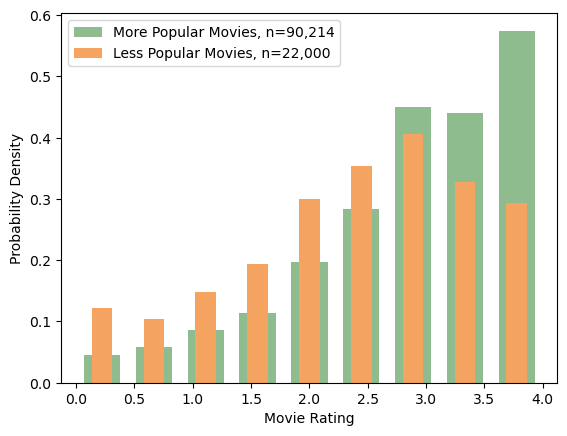

In [247]:
#U test

rating_popular = np.zeros(0)
rating_not_popular = np.zeros(0)
popularity = np.zeros(movie_data.shape[1])

#count of ratings per movie
count = movie_data.count(
    axis=0, 
    level=None, 
    numeric_only=False,
    )

#find median
count_median = count.median()
print(count_median)

#group movies by popularity
for i in range(len(popularity)):
    if count.iloc[i] > count_median:
        popularity[i] = 1 #1 = popular
    else:
        popularity[i] = 0 #0 = not popular
        
#append all the data in each group together:
for movie in range(len(popularity)):
    if popularity[movie]== 1:
        rating_popular = np.append(rating_popular,movie_data.iloc[:,movie])
    elif popularity[movie]== 0:
        rating_not_popular = np.append(rating_not_popular,movie_data.iloc[:,movie])        

#element-wise removal: 
rating_popular = element_wise_removal(rating_popular)
rating_not_popular = element_wise_removal(rating_not_popular)

#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(rating_popular, rating_not_popular))
print(scipy.stats.mannwhitneyu(rating_not_popular, rating_popular))
print(len(rating_popular))
print(len(rating_not_popular))

#plot:
plt.hist(rating_popular,density=True, rwidth = 0.7, bins = 9,  color = 'darkseagreen',label = "More Popular Movies, n=90,214")
plt.hist(rating_not_popular,density=True,  rwidth = 0.4, bins = 9, color = 'sandybrown', label = "Less Popular Movies, n=22,000")
plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")

#Conclusion: Movies that are more popular have higher ratings.

### Question 2:
2) Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of release to contrast movies in terms of whether they are old or new]

203.0
MannwhitneyuResult(statistic=1553577699.0, pvalue=1.2849216001533932e-06)
MannwhitneyuResult(statistic=1502583861.0, pvalue=1.2849216001533932e-06)
65690 46524


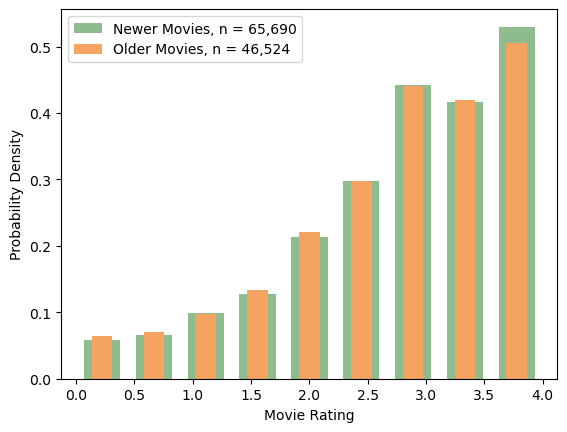

In [248]:
#U test
release_year = np.zeros(0)
age = np.zeros(movie_data.shape[1])
rating_new = np.zeros(0)
rating_old = np.zeros(0)

#get list of the movie names
movie_names = list(movie_data.columns.values)

#extract the year from each name
for i in range(len(movie_names)):
    movie = movie_names[i]
    release_year = np.append(release_year,movie[-6:len(movie)])
    release_year[i] = int(release_year[i][1:5])

release_year = np.array(release_year).astype(float)

#find median
year_median = np.median(release_year)

#group movies by old/new (check if greater or less than median)
for i in range(len(release_year)):
    if release_year[i] >= year_median:
        age[i] = 1 #1 = new
    else:
        age[i] = 0 #0 = old

print(sum(age))
#append all the data in each group together:
for movie in range(len(age)):
    if age[movie]== 1:
        rating_new = np.append(rating_new, movie_data.iloc[:,movie])
    elif age[movie]== 0:
        rating_old = np.append(rating_old, movie_data.iloc[:,movie])        

#element-wise removal: 
rating_new = element_wise_removal(rating_new)
rating_old = element_wise_removal(rating_old)

#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(rating_new, rating_old))
print(scipy.stats.mannwhitneyu(rating_old, rating_new))

print(len(rating_new), len(rating_old))
#plot:
plt.hist(rating_new, density=True, rwidth = 0.7, bins = 9,  color = 'darkseagreen', label = "Newer Movies, n = 65,690")
plt.hist(rating_old, density=True, rwidth = 0.4, bins = 9, color = 'sandybrown', label = "Older Movies, n = 46,524")

plt.legend()
plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()



# Conclusion: Yes! Newer movies are rated differently than older movies. 
# We can detect this from the fact that there is a lot of data so we can pick up tiny differences.

### Question 3:
3) Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

MannwhitneyuResult(statistic=96830.5, pvalue=0.050536625925559006)
MannwhitneyuResult(statistic=82232.5, pvalue=0.050536625925559006)
3.5 3.0


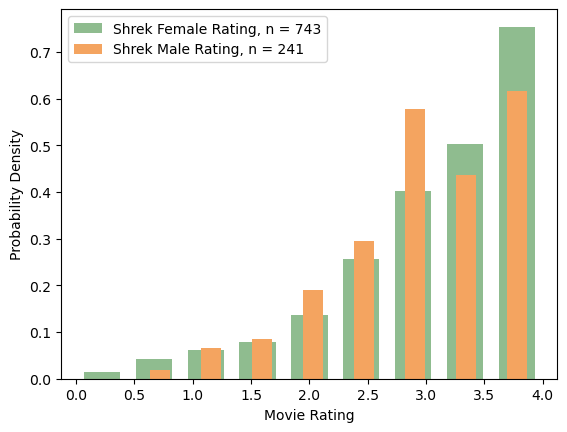

743 241


In [249]:
# CHECK

shrek_rating_male = np.zeros(0)
shrek_rating_female = np.zeros(0)
shrek_rating_self_described = np.zeros(0)

shrek_data = data_df['Shrek (2001)']
gender_data = data_df['Gender identity (1 = female; 2 = male; 3 = self-described)']

#row wise removal of data with NaNs (from Lab 3)
shrek_data, gender_data =  row_wise_removal(shrek_data, gender_data)

#separate shrek ratings by gender(1 female, 2 male, 3 self described)
for i in range(len(gender_data)):
    if gender_data[i] == 1:
        shrek_rating_female = np.append(shrek_rating_female,shrek_data[i])
    elif gender_data[i] == 2:
        shrek_rating_male = np.append(shrek_rating_male,shrek_data[i])
    elif gender_data[i] == 3:
        shrek_rating_self_described = np.append(shrek_rating_self_described,shrek_data[i])


#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(shrek_rating_female, shrek_rating_male))
print(scipy.stats.mannwhitneyu(shrek_rating_male, shrek_rating_female))

print(np.median(shrek_rating_female), np.median(shrek_rating_male))
#plot:
plt.hist(shrek_rating_female, density=True, rwidth = 0.7, bins = 9, color = 'darkseagreen', label = "Shrek Female Rating, n = 743")
plt.hist(shrek_rating_male, density=True, rwidth = 0.4, bins = 8, color = 'sandybrown', label = "Shrek Male Rating, n = 241")

plt.legend()
plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()

print(len(shrek_rating_female),len(shrek_rating_male))
# Conclusion: No! Males and females do not rate Shrek differently
# Less data - less power

### Question 4:
4) What proportion of movies are rated differently by male and female viewers?

50 350
0.125


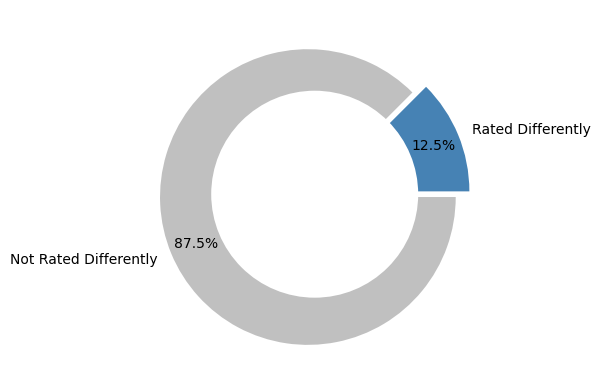

In [250]:
p_values = np.zeros(0)
male_female_different = 0
male_female_not_different = 0

for i in range(movie_data.shape[1]):
    movie_rating_i_male = np.zeros(0)
    movie_rating_i_female = np.zeros(0)
    movie_rating_i_self_described = np.zeros(0)
    gender_data = data_df['Gender identity (1 = female; 2 = male; 3 = self-described)']
    movie_i_data = movie_data.iloc[:,i] #get data for movie
    movie_i_data, gender_data =  row_wise_removal(movie_i_data, gender_data)#row-wise removal
    for j in range(len(gender_data)):
        if gender_data[j] == 1:
            movie_rating_i_female = np.append(movie_rating_i_female,movie_i_data[j])
        elif gender_data[j] == 2:
            movie_rating_i_male = np.append(movie_rating_i_male,movie_i_data[j])
        elif gender_data[j] == 3:
            movie_rating_i_self_described = np.append(movie_rating_i_self_described,movie_i_data[j])
    if scipy.stats.mannwhitneyu(movie_rating_i_female, movie_rating_i_male)[1]<0.005:
        male_female_different += 1
    else:
        male_female_not_different += 1

print(male_female_different,male_female_not_different)
print(male_female_different/(movie_data.shape[1]))

plt.plot([50,350],[0,1])

# given values

Category = ['Rated Differently', 'Not Rated Differently']
Movies = [male_female_different, male_female_not_different]
  
# colors
colors = ['steelblue', 'silver']
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(Movies, colors=colors, labels=Category,
        autopct='%1.1f%%', pctdistance=0.82,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  



### Question 5:
5) Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

MannwhitneyuResult(statistic=52929.0, pvalue=0.04319872995682849)
MannwhitneyuResult(statistic=64247.0, pvalue=0.04319872995682849)
151 776


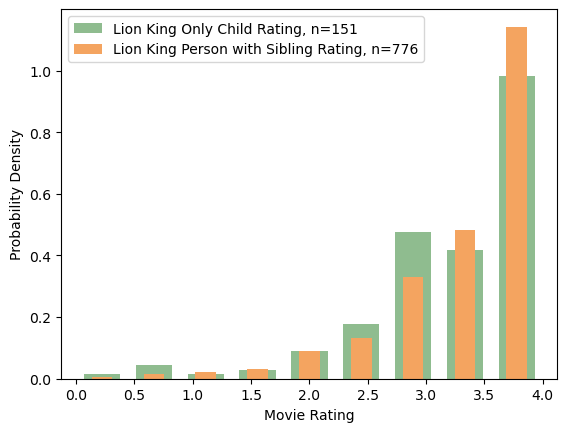

In [252]:
lion_king_rating_only_child = np.zeros(0)
lion_king_rating_siblings = np.zeros(0)
lion_king_rating_not_respond = np.zeros(0)

lion_king_data = data_df['The Lion King (1994)']
only_child_data = data_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']

#row wise removal of data with NaNs (from Lab 3)
lion_king_data, only_child_data =  row_wise_removal(lion_king_data, only_child_data)

#separate lion king ratings by only child status (1: Yes; 0: No; -1: Did not respond)
for i in range(len(only_child_data)):
    if only_child_data[i] == 1:
        lion_king_rating_only_child = np.append(lion_king_rating_only_child, lion_king_data[i])
    elif only_child_data[i] == 0:
        lion_king_rating_siblings = np.append(lion_king_rating_siblings, lion_king_data[i])
    elif only_child_data[i] == -1:
        lion_king_rating_not_respond = np.append(lion_king_rating_not_respond, lion_king_data[i])

#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(lion_king_rating_only_child, lion_king_rating_siblings))
print(scipy.stats.mannwhitneyu(lion_king_rating_siblings, lion_king_rating_only_child,))

print(len(lion_king_rating_only_child), len(lion_king_rating_siblings))

plt.hist(lion_king_rating_only_child, density=True, rwidth = 0.7, bins = 9, color = 'darkseagreen', label = "Lion King Only Child Rating, n=151")
plt.hist(lion_king_rating_siblings, density=True, rwidth = 0.4,  bins = 9,  color = 'sandybrown', label = "Lion King Person with Sibling Rating, n=776")

plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()


#Conclusion: No! Only children do not enjoy Lion King more than people with siblings.

### Question 6:
6) What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

7 393
0.0175


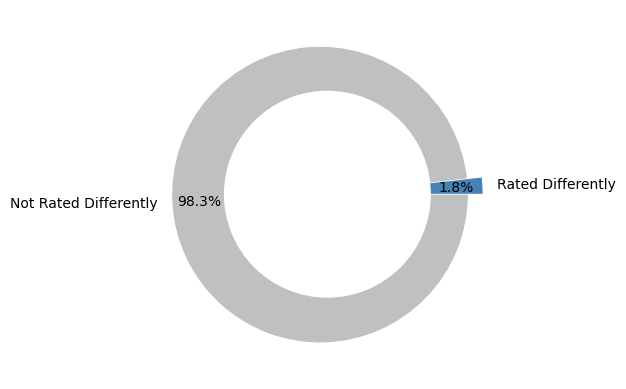

In [253]:
p_values = np.zeros(0)
only_child_different = 0
only_child_not_different = 0

for i in range(movie_data.shape[1]):
    movie_rating_i_only_child = np.zeros(0)
    movie_rating_i_sibling = np.zeros(0)
    movie_i_did_not_respond = np.zeros(0)
    only_child_data = data_df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)']
    movie_i_data = movie_data.iloc[:,i] #get data for movie
    movie_i_data, only_child_data =  row_wise_removal(movie_i_data, only_child_data)#row-wise removal
    for j in range(len(only_child_data)):
        if only_child_data[j] == 1:
            movie_rating_i_only_child = np.append(movie_rating_i_only_child,movie_i_data[j])
        elif only_child_data[j] == 0:
            movie_rating_i_sibling = np.append(movie_rating_i_sibling,movie_i_data[j])
        elif only_child_data[j] == -1:
            movie_i_did_not_respond = np.append(movie_i_did_not_respond,movie_i_data[j])
    if scipy.stats.mannwhitneyu(movie_rating_i_only_child, movie_rating_i_sibling)[1]<0.005:
        only_child_different += 1
    else:
        only_child_not_different += 1

print(only_child_different,only_child_not_different)
print(only_child_different/(movie_data.shape[1]))

Category = ['Rated Differently', 'Not Rated Differently']
Movies = [only_child_different, only_child_not_different]
  
# colors
colors = ['steelblue', 'silver']
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(Movies, colors=colors, labels=Category,
        autopct='%1.1f%%', pctdistance=0.82,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  


### Question 7:
7) Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

MannwhitneyuResult(statistic=56806.5, pvalue=0.1127642933222891)
MannwhitneyuResult(statistic=49303.5, pvalue=0.1127642933222891)
270 393


Text(0, 0.5, 'Probability Density')

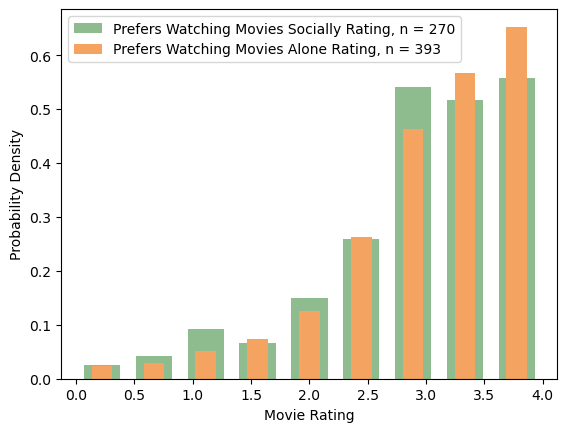

In [255]:
wolf_rating_alone = np.zeros(0)
wolf_rating_not_alone = np.zeros(0)
wolf_rating_not_respond = np.zeros(0)

wolf_data = data_df['The Wolf of Wall Street (2013)']
alone_data = data_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']

#row wise removal of data with NaNs (from Lab 3)
wolf_data, alone_data =  row_wise_removal(wolf_data, alone_data)

#separate wolf of wall street ratings by alone status (1: Yes; 0: No; -1: Did not respond)
for i in range(len(alone_data)):
    if alone_data[i] == 1:
        wolf_rating_alone = np.append(wolf_rating_alone, wolf_data[i])
    elif alone_data[i] == 0:
        wolf_rating_not_alone = np.append(wolf_rating_not_alone, wolf_data[i])
    elif alone_data[i] == -1:
        wolf_rating_not_respond = np.append(wolf_rating_not_respond, wolf_data[i])

#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(wolf_rating_alone, wolf_rating_not_alone))
print(scipy.stats.mannwhitneyu(wolf_rating_not_alone, wolf_rating_alone))



print(len(wolf_rating_not_alone), len(wolf_rating_alone))

plt.hist(wolf_rating_not_alone, density=True, rwidth = 0.7,  bins = 9, color = 'darkseagreen', label = "Prefers Watching Movies Socially Rating, n = 270")
plt.hist(wolf_rating_alone, density=True, rwidth = 0.4,  bins = 9, color = 'sandybrown', label = "Prefers Watching Movies Alone Rating, n = 393")

plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")

#No! People who like to watch movies socially do not enjoy The Wolf of Wall Street more than those who prefer to watch them alone.

### Question 8:
8) What proportion of movies exhibit such a “social watching” effect?

10 390
0.025


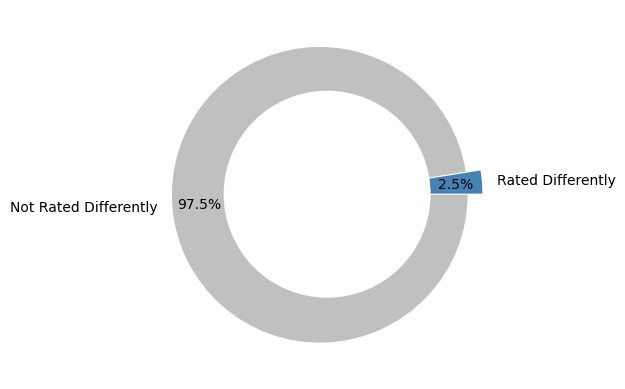

In [236]:
p_values = np.zeros(0)
alone_different = 0
social_different = 0

for i in range(movie_data.shape[1]):
    movie_rating_i_alone = np.zeros(0)
    movie_rating_i_social = np.zeros(0)
    movie_i_did_not_respond_alone = np.zeros(0)
    social_data = data_df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']
    movie_i_data = movie_data.iloc[:,i] #get data for movie
    movie_i_data, only_child_data =  row_wise_removal(movie_i_data, social_data)#row-wise removal
    for j in range(len(only_child_data)):
        if only_child_data[j] == 1:
            movie_rating_i_alone = np.append(movie_rating_i_alone,movie_i_data[j])
        elif only_child_data[j] == 0:
            movie_rating_i_social = np.append(movie_rating_i_social,movie_i_data[j])
        elif only_child_data[j] == -1:
            movie_i_did_not_respond_alone = np.append(movie_i_did_not_respond_alone,movie_i_data[j])
    if scipy.stats.mannwhitneyu(movie_rating_i_social, movie_rating_i_alone)[1]<0.005:
        alone_different += 1
    else:
        social_different += 1

print(alone_different,social_different)
print(alone_different/(movie_data.shape[1]))

Category = ['Rated Differently', 'Not Rated Differently']
Movies = [alone_different, social_different]
  
# colors
colors = ['steelblue', 'silver']
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(Movies, colors=colors, labels=Category,
        autopct='%1.1f%%', pctdistance=0.82,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

  

### Question 9:
9) Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

KstestResult(statistic=0.15269080020897632, pvalue=6.379381467525036e-10)
1014 857


Text(0, 0.5, 'Probability Density')

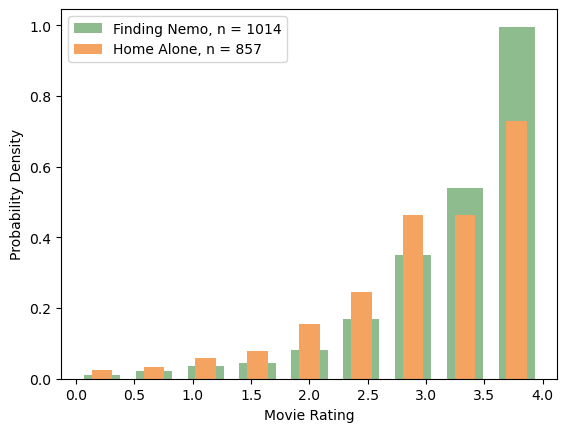

In [258]:
home_alone_data = data_df['Home Alone (1990)']
finding_nemo_data = data_df['Finding Nemo (2003)']

home_alone_data = element_wise_removal(home_alone_data)
finding_nemo_data = element_wise_removal(finding_nemo_data)

#KS test: 
print(scipy.stats.kstest(home_alone_data, finding_nemo_data))
   
print(len(finding_nemo_data), len(home_alone_data))

plt.hist(finding_nemo_data,density=True, rwidth = 0.7,  bins = 9,  color = 'darkseagreen', label = "Finding Nemo, n = 1014")
plt.hist(home_alone_data,density=True, rwidth = 0.4,  bins = 9,  color = 'sandybrown', label = "Home Alone, n = 857")
plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")

#Yes. The ratings distribution is different. 

### Question 10:
10) There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

Star Wars KruskalResult(statistic=193.51026675400544, pvalue=6.940162236984522e-40)
Harry Potter KruskalResult(statistic=5.8739552218536755, pvalue=0.11790622831256074)
The Matrix KruskalResult(statistic=40.32303905969196, pvalue=1.7537323830838066e-09)
Indiana Jones KruskalResult(statistic=54.19395477406098, pvalue=1.020118354785894e-11)
Jurassic Park KruskalResult(statistic=49.42733030275783, pvalue=1.8492328391686058e-11)
Pirates of the Caribbean KruskalResult(statistic=6.660021086485515, pvalue=0.035792727694248905)
Toy Story KruskalResult(statistic=23.496729938969775, pvalue=7.902234665149812e-06)
Batman KruskalResult(statistic=84.65778425637279, pvalue=4.1380499020034183e-19)


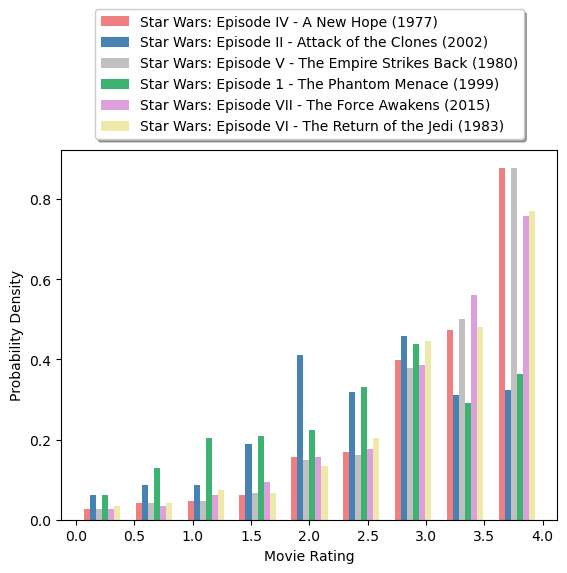

Star Wars n = 333


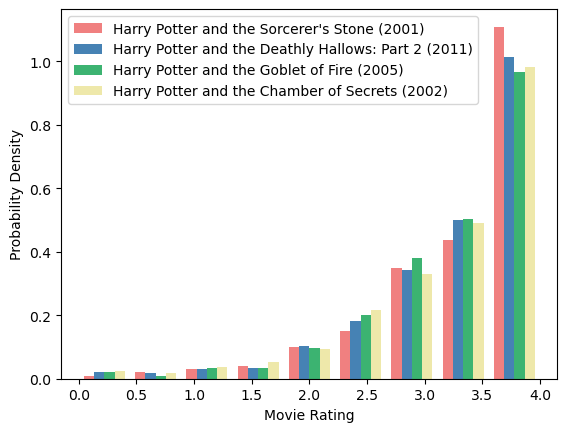

Harry Potter n = 710


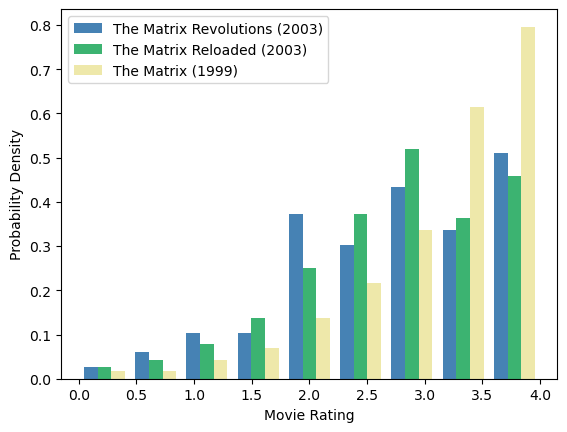

The Matrix n = 260


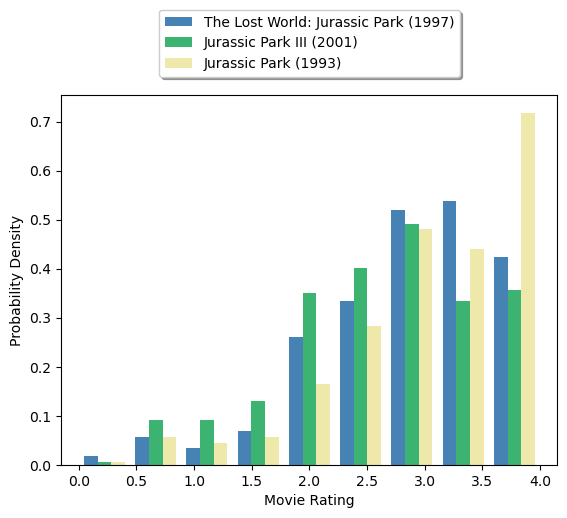

Jurassic Park n = 398


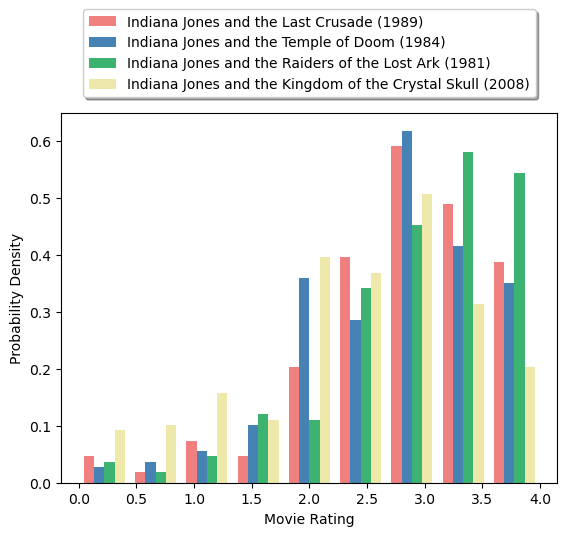

Indiana Jones n = 244


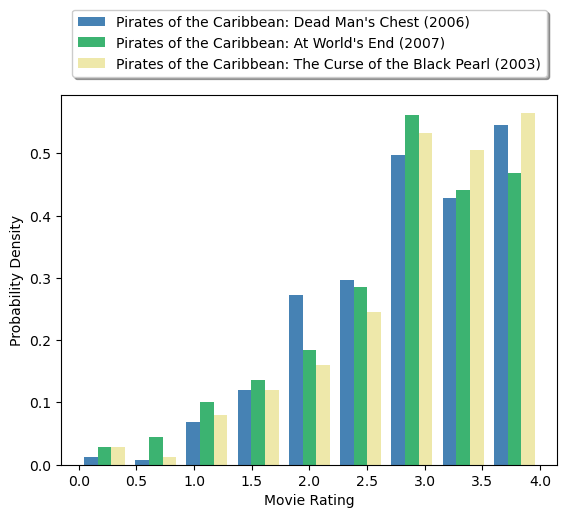

Pirates of the Caribbean n = 561


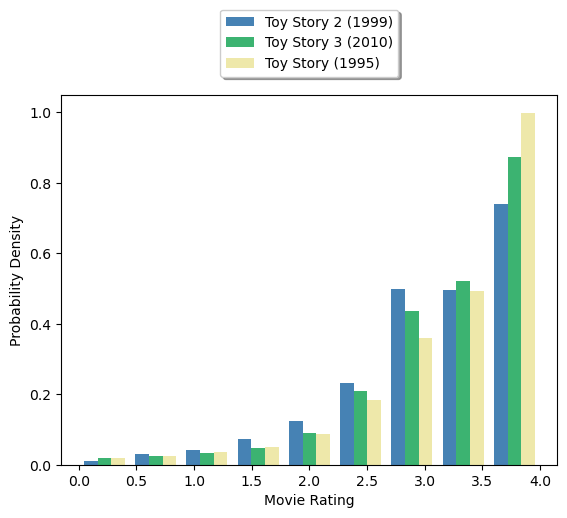

Toy Story n = 757


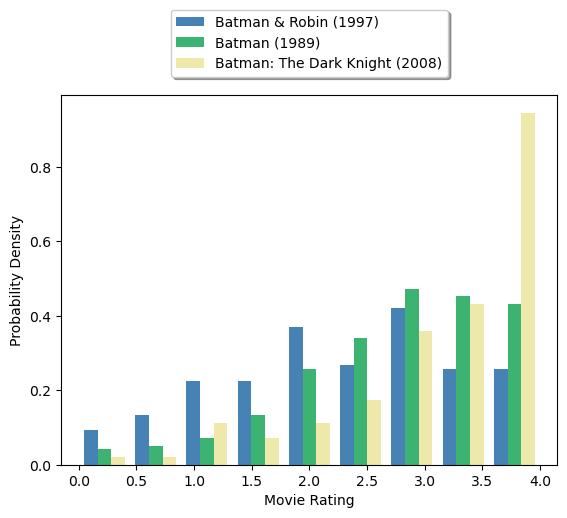

Batman n = 219


In [245]:
#Kruskal Wallis

star_wars_col = [col for col in data_df.columns if 'Star Wars' in col]
harry_potter_col = [col for col in data_df.columns if 'Harry Potter' in col]
matrix_col = [col for col in data_df.columns if 'The Matrix' in col]
indiana_jones_col = [col for col in data_df.columns if 'Indiana Jones' in col]
jurassic_park_col = [col for col in data_df.columns if 'Jurassic Park' in col]
pirates_col = [col for col in data_df.columns if 'Pirates of the Caribbean' in col]
toy_story_col = [col for col in data_df.columns if 'Toy Story' in col]
batman_col = [col for col in data_df.columns if 'Batman' in col]

#intially: get names of columns: print(star_wars_col,harry_potter_col,matrix_col,indiana_jones_col,jurassic_park_col,pirates_col,toy_story_col,batman_col)

star_wars_data = data_df[['Star Wars: Episode IV - A New Hope (1977)', 'Star Wars: Episode II - Attack of the Clones (2002)', 'Star Wars: Episode V - The Empire Strikes Back (1980)', 'Star Wars: Episode 1 - The Phantom Menace (1999)', 'Star Wars: Episode VII - The Force Awakens (2015)', 'Star Wars: Episode VI - The Return of the Jedi (1983)']]
harry_potter_data = data_df[['Harry Potter and the Sorcerer\'s Stone (2001)', 'Harry Potter and the Deathly Hallows: Part 2 (2011)', 'Harry Potter and the Goblet of Fire (2005)', 'Harry Potter and the Chamber of Secrets (2002)']]
matrix_data = data_df[['The Matrix Revolutions (2003)', 'The Matrix Reloaded (2003)', 'The Matrix (1999)']]
jurassic_park_data = data_df[['The Lost World: Jurassic Park (1997)', 'Jurassic Park III (2001)', 'Jurassic Park (1993)']]
indiana_jones_data = data_df[['Indiana Jones and the Last Crusade (1989)', 'Indiana Jones and the Temple of Doom (1984)', 'Indiana Jones and the Raiders of the Lost Ark (1981)', 'Indiana Jones and the Kingdom of the Crystal Skull (2008)']]
pirates_data = data_df[['Pirates of the Caribbean: Dead Man\'s Chest (2006)', 'Pirates of the Caribbean: At World\'s End (2007)', 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)']]
toy_story_data = data_df[['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story (1995)']]
batman_data = data_df[['Batman & Robin (1997)', 'Batman (1989)', 'Batman: The Dark Knight (2008)']]

#check size: print(star_wars_data.shape[1], harry_potter_data.shape[1], matrix_data.shape[1], jurassic_park_data.shape[1], indiana_jones_data.shape[1], pirates_data.shape[1], toy_story_data.shape[1],batman_data.shape[1])

#row-wise removal - expererienced by viewers
star_wars_data = row_wise_removal_6(star_wars_data.iloc[:,0],star_wars_data.iloc[:,1],star_wars_data.iloc[:,2],star_wars_data.iloc[:,3],star_wars_data.iloc[:,4],star_wars_data.iloc[:,5])
harry_potter_data = row_wise_removal_4(harry_potter_data.iloc[:,0],harry_potter_data.iloc[:,1],harry_potter_data.iloc[:,2],harry_potter_data.iloc[:,3])
matrix_data = row_wise_removal_3(matrix_data.iloc[:,0],matrix_data.iloc[:,1],matrix_data.iloc[:,2])
jurassic_park_data = row_wise_removal_3(jurassic_park_data.iloc[:,0],jurassic_park_data.iloc[:,1],jurassic_park_data.iloc[:,2])
indiana_jones_data = row_wise_removal_4(indiana_jones_data.iloc[:,0],indiana_jones_data.iloc[:,1],indiana_jones_data.iloc[:,2],indiana_jones_data.iloc[:,3])
pirates_data = row_wise_removal_3(pirates_data.iloc[:,0],pirates_data.iloc[:,1],pirates_data.iloc[:,2])
toy_story_data = row_wise_removal_3(toy_story_data.iloc[:,0],toy_story_data.iloc[:,1],toy_story_data.iloc[:,2])
batman_data = row_wise_removal_3(batman_data.iloc[:,0],batman_data.iloc[:,1],batman_data.iloc[:,2])

#Kruskal Wallis test
test_star_wars = stats.kruskal(star_wars_data[0],star_wars_data[1],star_wars_data[2],star_wars_data[3],star_wars_data[4], star_wars_data[5])
test_harry_potter = stats.kruskal(harry_potter_data[0],harry_potter_data[1],harry_potter_data[2],harry_potter_data[3])
test_matrix = stats.kruskal(matrix_data[0],matrix_data[1],matrix_data[2])
test_jurassic_park = stats.kruskal(jurassic_park_data[0],jurassic_park_data[1],jurassic_park_data[2])
test_indiana_jones = stats.kruskal(indiana_jones_data[0],indiana_jones_data[1],indiana_jones_data[2],indiana_jones_data[3])
test_pirates = stats.kruskal(pirates_data[0],pirates_data[1],pirates_data[2])
test_toy_story = stats.kruskal(toy_story_data[0],toy_story_data[1],toy_story_data[2])
test_batman = stats.kruskal(batman_data[0],batman_data[1],batman_data[2])

print("Star Wars",test_star_wars)
print("Harry Potter",test_harry_potter)
print("The Matrix", test_matrix)
print("Indiana Jones", test_indiana_jones)
print("Jurassic Park",test_jurassic_park)
print("Pirates of the Caribbean", test_pirates)
print("Toy Story", test_toy_story)
print("Batman", test_batman)

# plot
star_wars_colors = ['lightcoral','steelblue','silver','mediumseagreen','plum','palegoldenrod']
plt.hist(star_wars_data, density=True, color = star_wars_colors, rwidth = 0.7,  bins = 9, label = star_wars_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.4),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Star Wars n =",len(star_wars_data[0]))

harry_potter_colors = ['lightcoral','steelblue','mediumseagreen','palegoldenrod']
plt.hist(harry_potter_data, density=True, color = harry_potter_colors, bins = 9, label = harry_potter_col)
plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Harry Potter n =",len(harry_potter_data[0]))


matrix_colors = ['steelblue','mediumseagreen','palegoldenrod']
plt.hist(matrix_data, density=True, color = matrix_colors, bins = 9, label = matrix_col)
plt.legend()

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("The Matrix n =",len(matrix_data[0]))

jurassic_park_colors = ['steelblue','mediumseagreen','palegoldenrod']
plt.hist(jurassic_park_data, density=True, color = jurassic_park_colors, bins = 9, label = jurassic_park_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Jurassic Park n =",len(jurassic_park_data[0]))

indiana_jones_colors = ['lightcoral','steelblue','mediumseagreen','palegoldenrod']
plt.hist(indiana_jones_data, density=True, color = indiana_jones_colors, bins = 9, label = indiana_jones_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Indiana Jones n =",len(indiana_jones_data[0]))

pirates_colors = ['steelblue','mediumseagreen','palegoldenrod']
plt.hist(pirates_data, density=True, color = pirates_colors, bins = 9, label = pirates_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Pirates of the Caribbean n =",len(pirates_data[0]))

toy_story_colors = ['steelblue','mediumseagreen','palegoldenrod']
plt.hist(toy_story_data, density=True, color = toy_story_colors, bins = 9, label = toy_story_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Toy Story n =",len(toy_story_data[0]))

batman_colors = ['steelblue','mediumseagreen','palegoldenrod']
plt.hist(batman_data, density=True, color = batman_colors, bins = 9, label = batman_col)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25),
          fancybox=True, shadow=True, ncol=1)

plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()
print("Batman n =",len(batman_data[0]))


### Question 11 (Extra Credit):
11) Extra Credit: Tell us something interesting and true (supported by a significance test of some kind) about the movies in this dataset that is not already covered by the questions above [for 5% of the grade score].

440 49
MannwhitneyuResult(statistic=13701.0, pvalue=0.0014325419917493862)
MannwhitneyuResult(statistic=7859.0, pvalue=0.0014325419917493862)
440 49


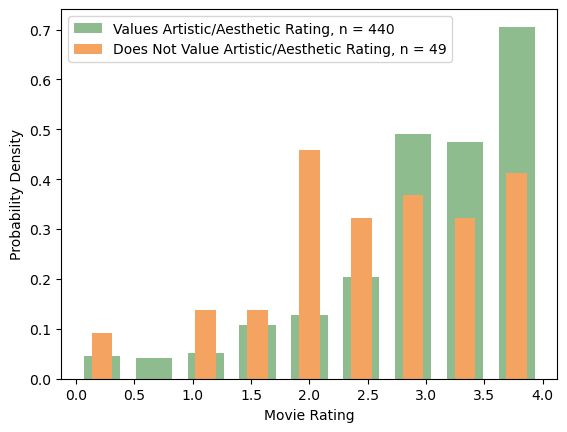

In [256]:
# Do people who value artistic/aesthetic experiences
# rate The Nightmare Before Christmas differently than those who do not?

nightmare_rating_art = np.zeros(0)
nightmare_rating_not_art = np.zeros(0)

nightmare_data = data_df['The Nightmare Before Christmas (1993)']
art_lit_data = data_df['Values artistic/aesthetic experiences']

#row wise removal of data with NaNs (from Lab 3)
nightmare_data, art_lit_data =  row_wise_removal(nightmare_data, art_lit_data)

#separate lion king ratings by only child status (1: Yes; 0: No; -1: Did not respond)
for i in range(len(art_lit_data)):
    if art_lit_data[i] > 3:
        nightmare_rating_art = np.append(nightmare_rating_art, nightmare_data[i])
    elif art_lit_data[i] < 3:
        nightmare_rating_not_art = np.append(nightmare_rating_not_art, nightmare_data[i])

print(len(nightmare_rating_art), len(nightmare_rating_not_art))        
        
#mann-whitney U-test:
print(scipy.stats.mannwhitneyu(nightmare_rating_art, nightmare_rating_not_art))
print(scipy.stats.mannwhitneyu(nightmare_rating_not_art, nightmare_rating_art))
print(len(nightmare_rating_art), len(nightmare_rating_not_art))


plt.hist(nightmare_rating_art, density=True, rwidth = 0.7, bins = 9, color = 'darkseagreen', label = "Values Artistic/Aesthetic Rating, n = 440")
plt.hist(nightmare_rating_not_art, density=True, rwidth = 0.4,  bins = 9,  color = 'sandybrown', label = "Does Not Value Artistic/Aesthetic Rating, n = 49")

plt.legend()
plt.xlabel("Movie Rating")
plt.ylabel("Probability Density")
plt.show()


8 392
0.02


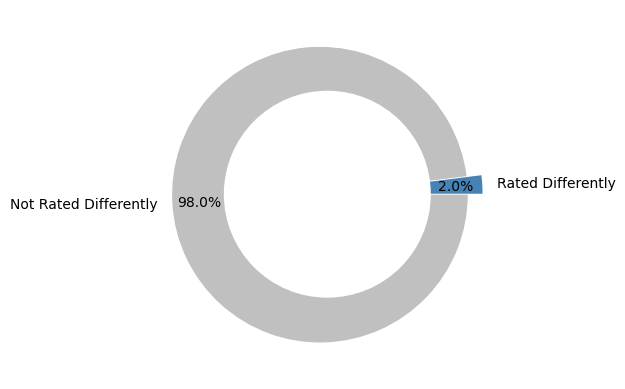

In [257]:
# What proportion of movies are rated differently by
# people who say they are sophisticated in art, music or literature?

p_values = np.zeros(0)
art_different = 0
art_not_different = 0

for i in range(movie_data.shape[1]):
    movie_rating_i_art = np.zeros(0)
    movie_rating_i_not_art = np.zeros(0)
    art_data = data_df['Values artistic/aesthetic experiences']
    movie_i_data = movie_data.iloc[:,i] #get data for movie
    movie_i_data, art_data =  row_wise_removal(movie_i_data, art_data)#row-wise removal
    for j in range(len(art_data)):
        if art_data[j] > 3:
            movie_rating_i_art = np.append(movie_rating_i_art,movie_i_data[j])
        elif art_data[j] < 3 :
            movie_rating_i_not_art = np.append(movie_rating_i_not_art,movie_i_data[j])
    if scipy.stats.mannwhitneyu(movie_rating_i_art, movie_rating_i_not_art)[1]<0.005:
        art_different += 1
#         print(movie_data.iloc[:,i])
    else:
        art_not_different += 1

print(art_different,art_not_different)
print(art_different/(movie_data.shape[1]))

Category = ['Rated Differently', 'Not Rated Differently']
Movies = [art_different, art_not_different]
  
# colors
colors = ['steelblue', 'silver']
# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(Movies, colors=colors, labels=Category,
        autopct='%1.1f%%', pctdistance=0.82,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

### Functions:

In [87]:
#row-wise removal with 2 columns 

def row_wise_removal(x, y): 
    data_1 = pd.to_numeric(x,errors='coerce').values
    data_2 = pd.to_numeric(y,errors='coerce').values
    temp = np.array([pd.isnull(data_1),pd.isnull(data_2)],dtype=bool)
    temp2 = temp*1 # convert boolean to int
    temp2 = sum(temp2) # take sum of each participant
    missingData = np.where(temp2>0) # find participants with missing data
    data_1 = np.delete(data_1,missingData) # delete missing data from array
    data_2 = np.delete(data_2,missingData) # delete missing data from array
    
    return data_1, data_2

In [88]:
#row-wise removal with 3 columns 

def row_wise_removal_3(x, y, z): 
    data_1 = pd.to_numeric(x,errors='coerce').values
    data_2 = pd.to_numeric(y,errors='coerce').values
    data_3 = pd.to_numeric(z,errors='coerce').values
    temp = np.array([pd.isnull(data_1),pd.isnull(data_2),pd.isnull(data_3)],dtype=bool)
    temp2 = temp*1 # convert boolean to int
    temp2 = sum(temp2) # take sum of each participant
    missingData = np.where(temp2>0) # find participants with missing data
    data_1 = np.delete(data_1,missingData) # delete missing data from array
    data_2 = np.delete(data_2,missingData) # delete missing data from array
    data_3 = np.delete(data_3,missingData) # delete missing data from array

    
    return data_1, data_2, data_3

In [89]:
#row-wise removal with 4 columns 

def row_wise_removal_4(x, y, z, a): 
    data_1 = pd.to_numeric(x,errors='coerce').values
    data_2 = pd.to_numeric(y,errors='coerce').values
    data_3 = pd.to_numeric(z,errors='coerce').values
    data_4 = pd.to_numeric(a,errors='coerce').values
    temp = np.array([pd.isnull(data_1),pd.isnull(data_2),pd.isnull(data_3),pd.isnull(data_4)],dtype=bool)
    temp2 = temp*1 # convert boolean to int
    temp2 = sum(temp2) # take sum of each participant
    missingData = np.where(temp2>0) # find participants with missing data
    data_1 = np.delete(data_1,missingData) # delete missing data from array
    data_2 = np.delete(data_2,missingData) # delete missing data from array
    data_3 = np.delete(data_3,missingData) # delete missing data from array
    data_4 = np.delete(data_4,missingData) # delete missing data from array

    
    return data_1, data_2, data_3, data_4, 

In [90]:
#row-wise removal with 6 columns 

def row_wise_removal_6(x, y, z, a, b, c): 
    data_1 = pd.to_numeric(x,errors='coerce').values
    data_2 = pd.to_numeric(y,errors='coerce').values
    data_3 = pd.to_numeric(z,errors='coerce').values
    data_4 = pd.to_numeric(a,errors='coerce').values
    data_5 = pd.to_numeric(b,errors='coerce').values
    data_6 = pd.to_numeric(c,errors='coerce').values
    temp = np.array([pd.isnull(data_1),pd.isnull(data_2),pd.isnull(data_3),pd.isnull(data_4),pd.isnull(data_5),pd.isnull(data_6)],dtype=bool)
    temp2 = temp*1 # convert boolean to int
    temp2 = sum(temp2) # take sum of each participant
    missingData = np.where(temp2>0) # find participants with missing data
    data_1 = np.delete(data_1,missingData) # delete missing data from array
    data_2 = np.delete(data_2,missingData) # delete missing data from array
    data_3 = np.delete(data_3,missingData) # delete missing data from array
    data_4 = np.delete(data_4,missingData) # delete missing data from array
    data_5 = np.delete(data_5,missingData) # delete missing data from array
    data_6 = np.delete(data_6,missingData) # delete missing data from array
    
    return data_1, data_2, data_3, data_4, data_5, data_6

In [91]:
# Element-wise removal :
def element_wise_removal (data):
    return data[np.isfinite(data)] # only keep the finite elements (not infinity or NaN)
